# Analiza skupień w nigeryjskiej muzyce

Zaimportujmy zależności (seaborn to biblioteka do wizualizacji) oraz dane.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("nigerian-songs.csv")

Zobaczmy co mamy w danych

In [2]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [3]:
df['artist_top_genre']

0      alternative r&b
1              afropop
2            indie r&b
3         nigerian pop
4              afropop
            ...       
525     afro dancehall
526     afro dancehall
527     afro dancehall
528     afro dancehall
529     afro dancehall
Name: artist_top_genre, Length: 530, dtype: object

Skupmy się na trzech gatunkach i zobaczmy ich liczebność w naszych danych

Text(0.5, 1.0, 'Top genres')

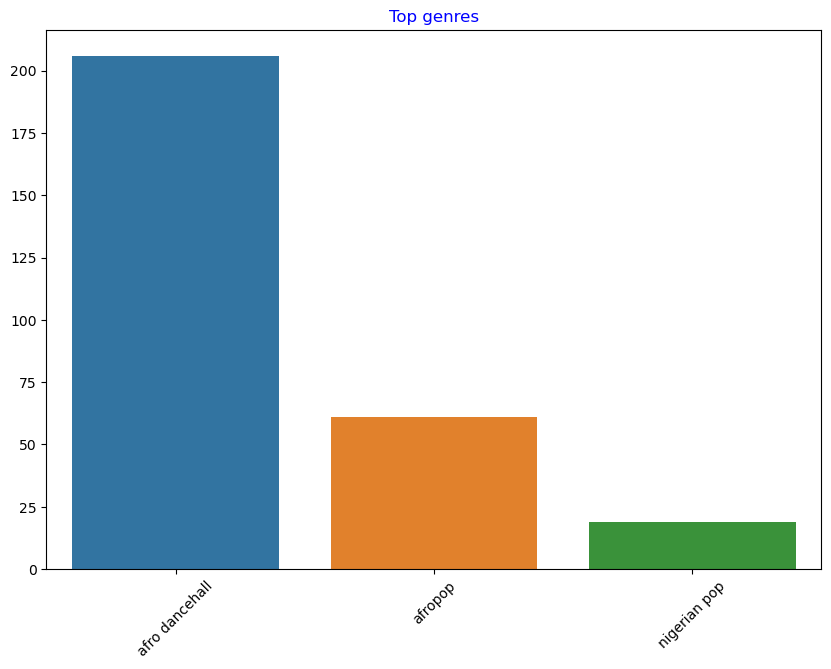

In [4]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [5]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4


Jak czyste są dane? Używając diagramów pudełkowych (box plots) sprawdźmy odchyły (outliery). Docelowo skupimy się na kolumnach, które mają mniej outlierów, ale alternatywnie dane można z nich oczyścić. Diagramy pudełkowe pokazują różnorodność danych i pomogą wybrać kolmuny które zastosujemy w eksperymencie clusteringowych. Ważna sprawa, diagramy pudełkowe wbrew pozorom nie pokazują wariancji.

<Axes: xlabel='release_date'>

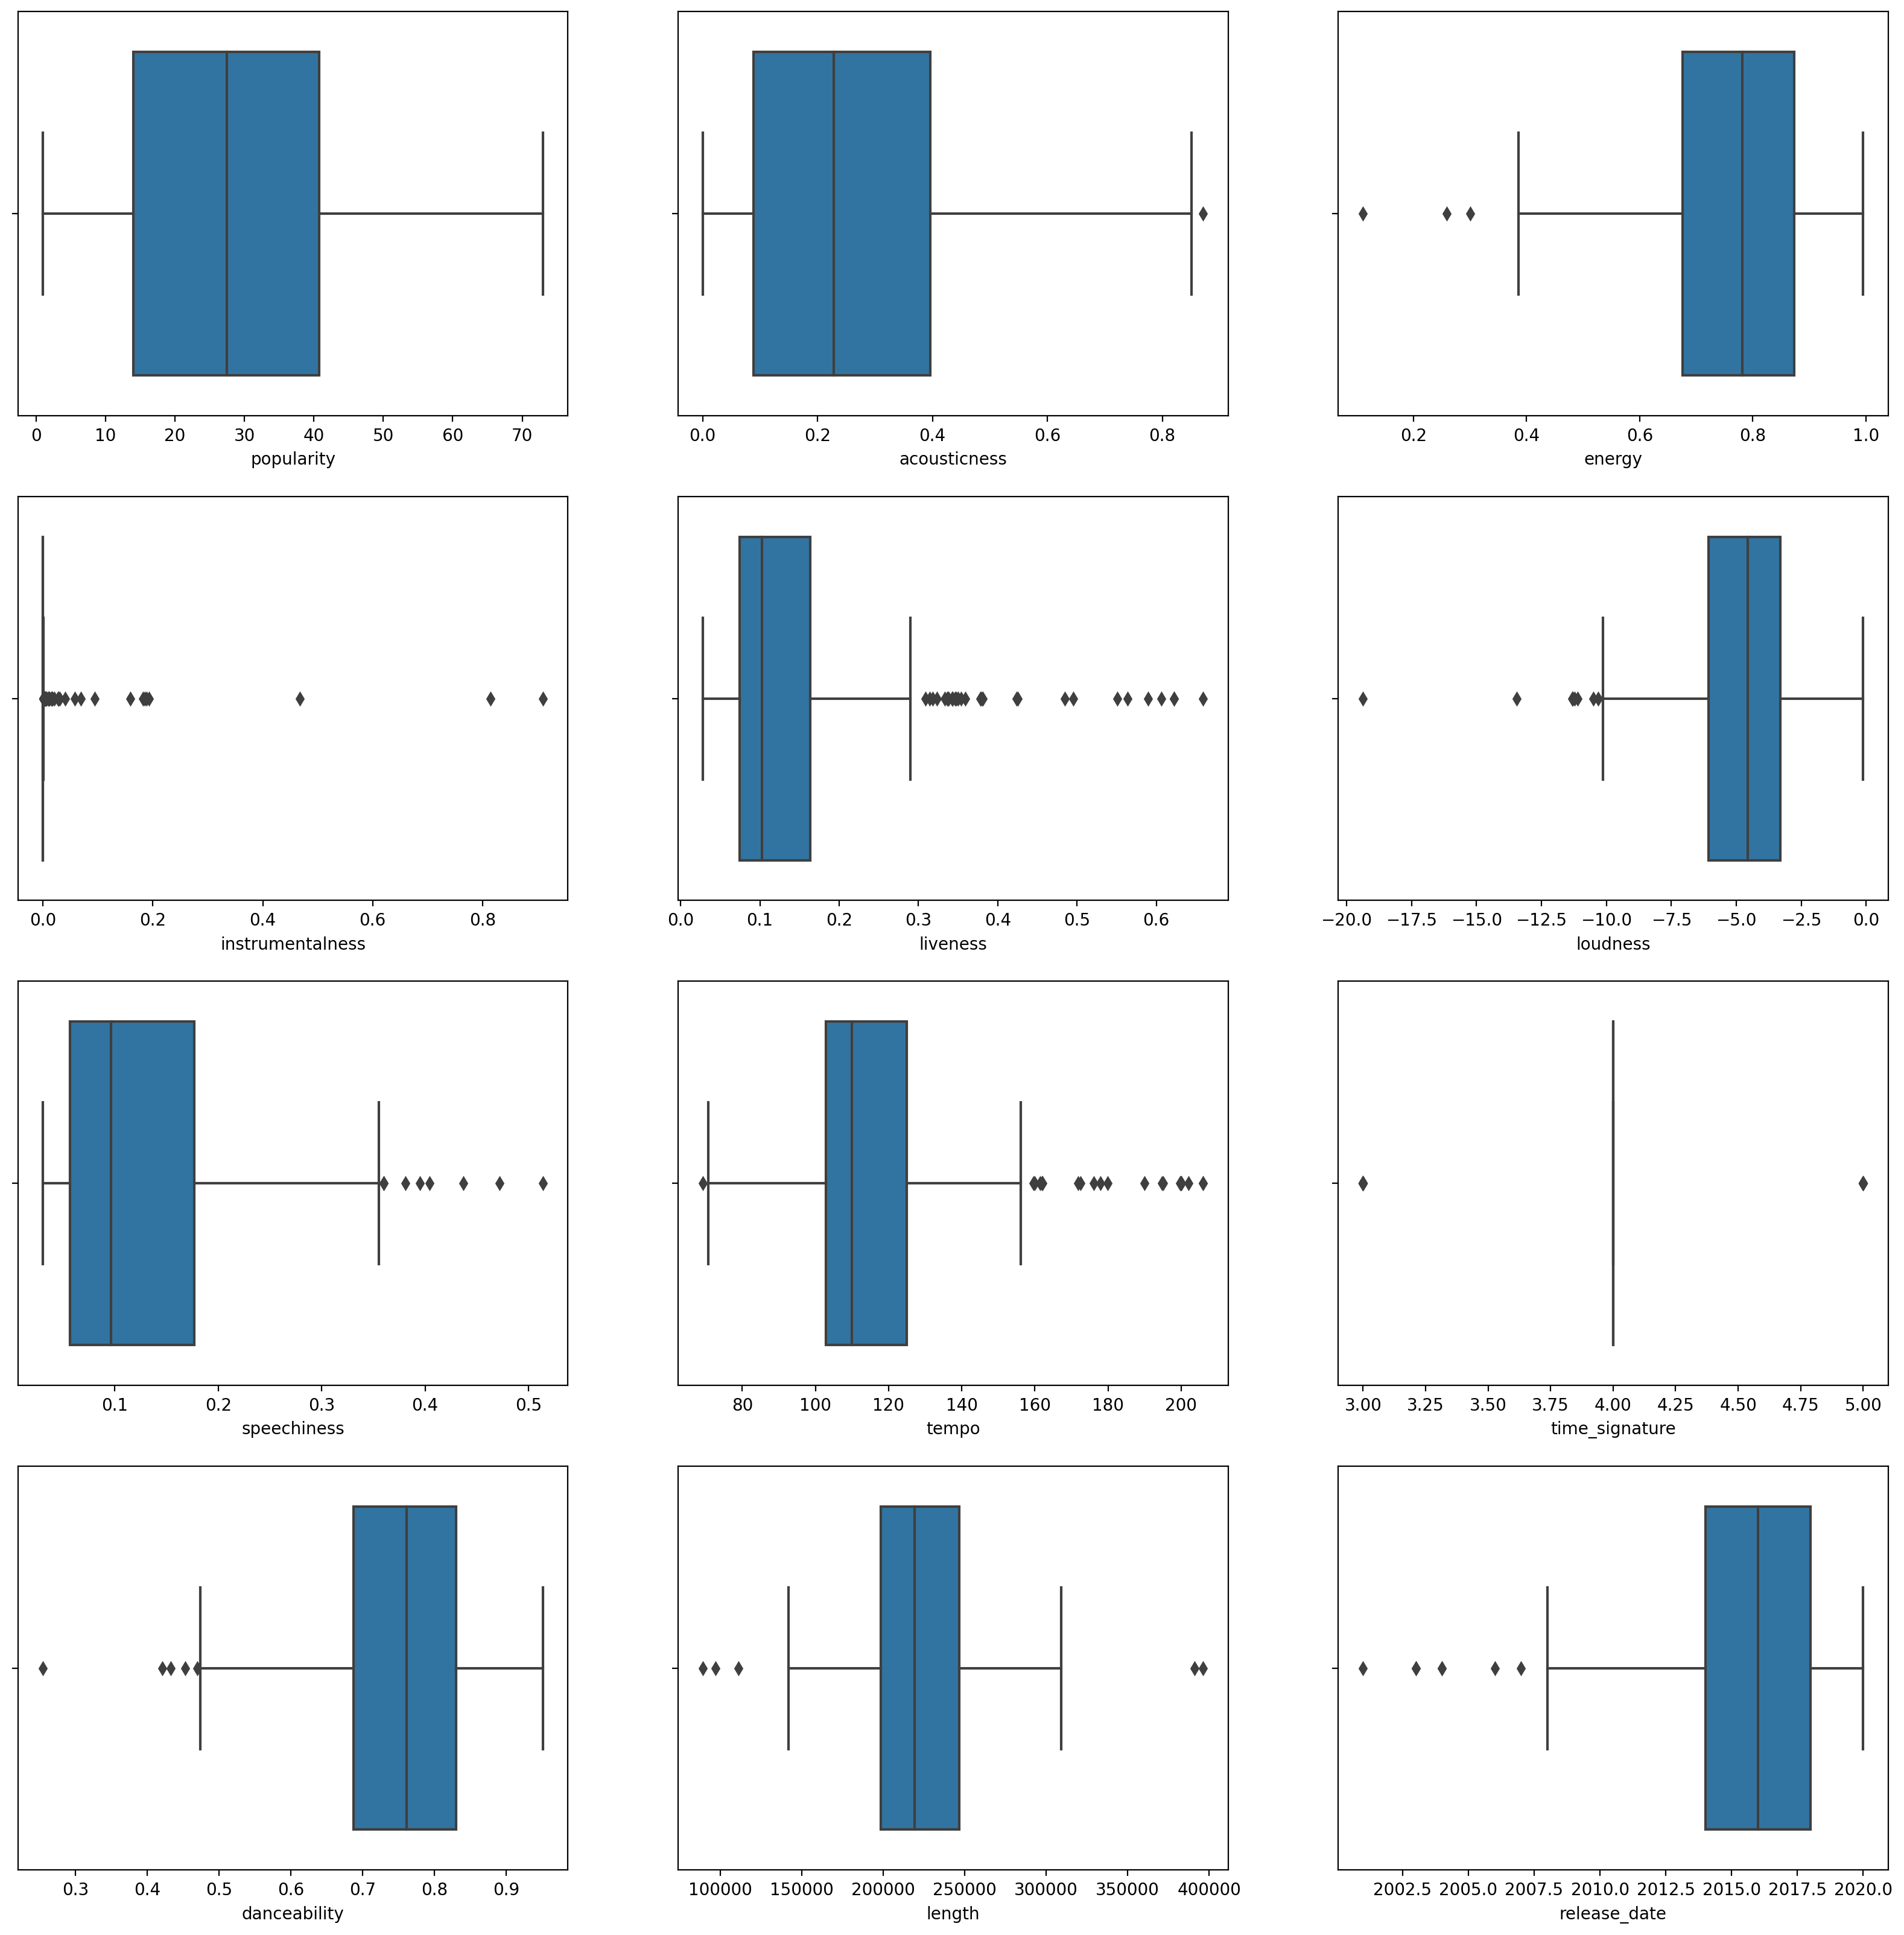

In [6]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

Wybierz kilka kolumn o jak najmniejszej liczbie outlierów, jedna z możliwości jest zaproponowana. Musimy pamiętać, by zawrzeć kolumnę artist_top_genre by zachować informację decydującą o podziale na klastry.

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]
y = df['artist_top_genre']
X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])
y = le.transform(y)

In [8]:
X

,artist_top_genre,popularity,danceability,acousticness,loudness,energy
1,1,30,0.710,0.0822,-5.640,0.683
3,2,14,0.894,0.7980,-4.961,0.611
4,1,25,0.702,0.1160,-6.044,0.833
5,2,26,0.803,0.1270,-10.034,0.525
6,2,29,0.818,0.4520,-9.840,0.587
...,...,...,...,...,...,...
514,0,20,0.838,0.0358,-3.723,0.931
515,0,14,0.786,0.1950,-4.232,0.806
519,1,2,0.879,0.2240,-4.602,0.916
522,0,26,0.863,0.0366,-3.130,0.896


Do clusteringu użyjemy algorytmu k-średnich. Ma on tę cechę, że musimy mu podać wprost jako wejście ilu wygenerowanych przez niego klastrów oczekujemy na wyjściu. Sprawdźmy na różnej liczbie klastrów jak to będzie wyglądać i zbierzmy metryki pokazujące jak dobrze zostało to wykonane, pomagające dobrać optymalną liczbę klastrów - po pierwsze wartość `WCSS (Within-Cluster Sum of Square)`, czyli sumę kwadratów odległości próbek od centrum klastra.

**Zadanie 1.** Spójrz w dokumentację algorytmu KMeans w scikit-learnie i w odpowiednim miejscu wpisz wyrażenie które pozwoli zebrać wartości WCSS

In [9]:
from sklearn.cluster import KMeans
y_cluster_kmeans = {}
kmeans_models = {}
wcss = []
for i in range(2, 11): # dla liczby klastrów od 2 do 10
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0) # tworzymy instancję modelu
    kmeans.n_init = 10
    kmeans.fit(X) # uczymy model
    print(f"{i} clusters generated")
    wcss.append(kmeans.inertia_) # zbieramy metrykę
    kmeans_models[i] = kmeans
    y_cluster_kmeans[i] = kmeans.predict(X) # dokonujemy prognozy
y_cluster_kmeans

C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


2 clusters generated


C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


3 clusters generated


C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


4 clusters generated


C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


5 clusters generated


C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


6 clusters generated


C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


7 clusters generated


C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


8 clusters generated


C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


9 clusters generated


C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


10 clusters generated


{2: array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 3: array([2, 1, 2, 2, 2, 2, 2, 2

Te cyfry niewiele nam mówią, wyznaczmy więc współczynnik `silhouette` który oceni jak pogrupowane zostały dane. Wylicza on średnie odległości wewnątrz klastrów oraz do ich najbliższych sąsiadów. Ma on zatem wzór $$ silhouette(X)= \frac{(b-a)}{max(a,b)} $$
gdzie `a` to średnia odległość próbki od próbek we własnym klastrze, a `b` to średnia odległość próbki od próbek w najbliższym nie-własnym klastrze. Optymalna wartość to 1.

**Zadanie 2.** Zaimplementuj ręcznie funkcję która pozwoli wyznaczyć wartość współczynnika silhouette dla wykonanego clusteringu, będziesz do tego potrzebować niektórych atrybutów modelu kmeans (spójrz w dokumentację), np. kmeans.cluster_centers_ czyli współprzędne centrów klastrów.

In [10]:
from sklearn.metrics import pairwise_distances
import numpy as np

def silhouette(X, labels, centers):
    n_samples = len(X)
    n_clusters = len(centers)

    distances = pairwise_distances(X)

    cluster_distances = pairwise_distances(X, centers)

    a = np.zeros(n_samples)
    b = np.ones(n_samples) * np.inf
    for i in range(n_samples):
        idx = np.where(labels == labels[i])[0]
        a[i] = np.mean(distances[i, idx])

        for j in range(n_clusters):
            if j != labels[i]:
                idx = np.where(labels == j)[0]
                d = np.mean(distances[i, idx])
                if d < b[i]:
                    b[i] = d

    s = (b - a) / np.maximum(a, b)

    if n_clusters == 1:
        return 0

    return np.mean(s)


Wywołajmy naszą funkcję

In [11]:
silhouette(X, y_cluster_kmeans[10], kmeans_models[10].cluster_centers_)


0.39877894067549213

Wykorzystajmy teraz wbudowaną w scikit-learn funkcję, żeby sprawdzić czy powyższy wynik się zgadza

In [12]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans[10])
score

0.37713142925827164

Skoro mamy już wartości metryk, wybierzmy liczbę klastrów, która wydaje się najbardziej odpowiednia. Możemy się jeszcze wspomóc najprostszą (i najbardziej "na wyczucie") z metod doboru, tzw. metodą łokcia (Elbow Method), która na podstawie wystąpienia najbardziej dynamicznego zagięcia na wykresie zależności wartości WCSS od liczby klastrów, wybiera optymalną ich liczbę.

C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

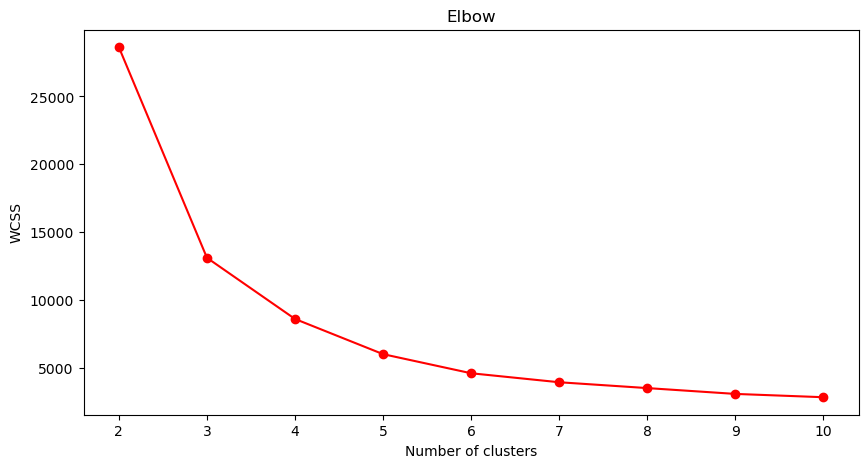

In [13]:
wcss = []
plt.figure(figsize=(10,5))
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss, marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Na podstawie zebranych danych, wybierz liczbę klastrów

C:\Users\hadhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


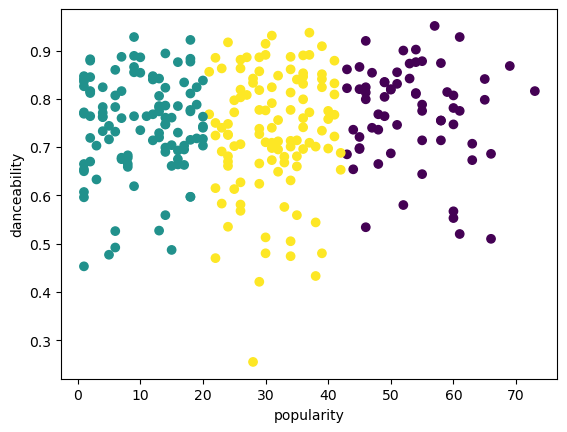

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,  init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

Sprawdźmy prawdziwą trafność klasteryzacji, czyli porównajmy klasy przyporządkowane przez nasz model do prawdziwych klas.

In [15]:
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 69 out of 286 samples were correctly labeled.
Accuracy score: 0.24


**Zadanie 3.** W dokładnie taki sam sposób jak nauczyliśmy model KMeans (ostatnia komórka nad powyższym wykresem), naucz z wykorzystaniem biblioteki scikit-learn po kilka różnie skonfigurowanych modeli algorytmów DBSCAN oraz AffinityPropagation, (które same dobierają liczbę klastrów) i analogicznie zilustruj w jaki sposób podzieliły dane.

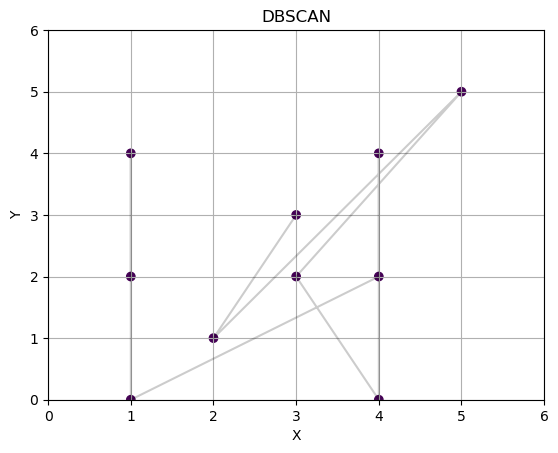

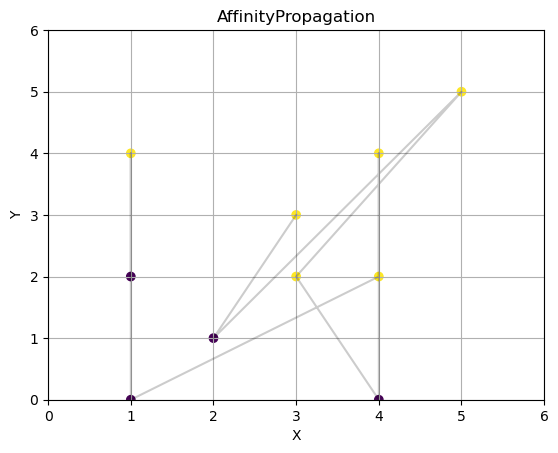

In [16]:
from sklearn.cluster import DBSCAN, AffinityPropagation
#dane
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0], [3, 2], [5, 5], [2, 1], [3, 3]])

#DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan.fit(X)
labels_dbscan = dbscan.labels_

#wykres
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan)
plt.plot(X[:, 0], X[:, 1], 'k-', alpha=0.2)
plt.title('DBSCAN')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.grid(True)
plt.show()

#AffinityPropagation
affprop = AffinityPropagation()
affprop.fit(X)
labels_affprop = affprop.labels_

#wykres
plt.scatter(X[:, 0], X[:, 1], c=labels_affprop)
plt.plot(X[:, 0], X[:, 1], 'k-', alpha=0.2)
plt.title('AffinityPropagation')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.grid(True)
plt.show()



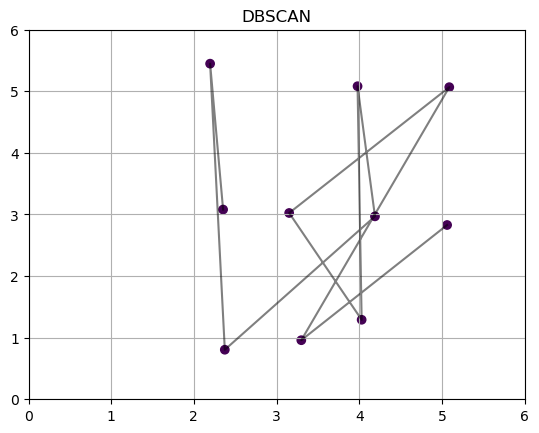

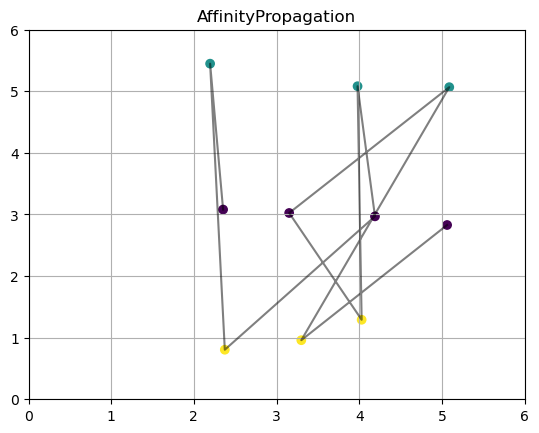

In [17]:
#data
np.random.seed(0)
X = np.array([[2, 3], [2, 5], [2, 1], [4, 3], [4, 5], [4, 1], [3, 3], [5, 5], [3, 1], [5, 3]], dtype=np.float64)
noise = np.random.normal(0, 0.2, size=X.shape).astype(np.float64)
X += noise

#DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(X)
labels_dbscan = dbscan.labels_

#wykres
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan)
plt.plot(X[:, 0], X[:, 1], 'k-', alpha=0.5)
plt.title('DBSCAN')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.grid(True)
plt.show()

#AffinityPropagation
affprop = AffinityPropagation(damping=0.7)
affprop.fit(X)
labels_affprop = affprop.labels_

#wykres
plt.scatter(X[:, 0], X[:, 1], c=labels_affprop)
plt.plot(X[:, 0], X[:, 1], 'k-', alpha=0.5)
plt.title('AffinityPropagation')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.grid(True)
plt.show()
